# Evaluate MLP and CNN models

Inspired by: https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/

In [1]:
import torch
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt

import helpers.NNUtils as nnu
from models import MLP, CNN

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(1976);

In [3]:
train_dataset, val_dataset, holdback_dataset = nnu.loadMNISTDatasets()
_,_, holdback_loader = nnu.getMNISTLoaders([train_dataset, val_dataset, holdback_dataset],batch_size=1000)

In [5]:
model = CNN.LeNet5().to(device)
nnu.loadModel(model, 'LeNet5');

In [6]:
cms = nnu.ComputeConfusionMatrices(model, holdback_loader)

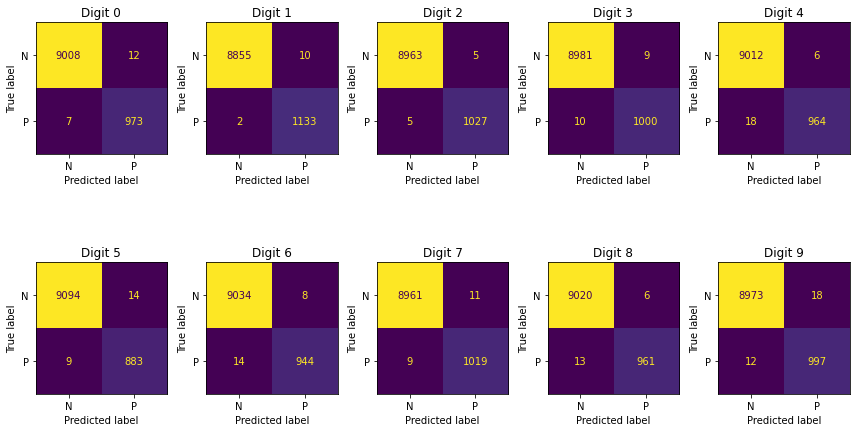

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(12, 7))
    
for cm, axes, title in zip(cms, ax.flatten(), list(range(10))):
    axes.title.set_text(f'Digit {title}')
    sklearn.metrics.ConfusionMatrixDisplay(cm, display_labels=['N', 'P']).plot(ax=axes, colorbar=False)

fig.tight_layout()
plt.show()